**<h1>Sistema Masa-Resorte: Solución mecánica bajo la formulación Hamiltoniana**</h1>


**Integrantes:**
1. Jerónimo López Gómez C.C. 10017353334
2. Valentina Lobo Ruiz C.C. 1067912559

## **Planteamento del problema**

Los distintos tipos de osciladores son los sistemas más ubicuos analizados por medio de la mecánica clásica, muchos sistemas presentan un movimiento aproximado de armónico simple. Los métodos hamiltoneados, en particular la representación del espacio de fases, nos permiten realizar un analísis profundo y detallado del sistema; por otro lado, se puede considerar que  la invariancia adiabática es más relevante que la conservación de la energía. Por todo lo anteriormente mencionado, en este trabajo se hará el desarrollo analítico y númerico de la mecánica hamiltoneana de un sistema masa-resorte unidimensional, así mismo se analizará la invariancia adiabática del sistema cuando presenta cambios pequeños de su masa a lo largo de un periodo.

## **Desarrollo teórico y discusión**

Planteemos el modelo diferencial que gobierna el comportamiento de un sistema masa-resorte unidimensional, tal y como se sigue:

\begin{equation}
m \ddot x + b\dot x + kx = f(t,x)
\end{equation}

La expresión anterior denota la fuerza total que actual sobre el sistema masa resorte en todo instante de tiempo, a excepción del instante en t = 0 en el cuál se asumirá que 

\begin{equation} \tag{2}
F(t=0) = -kx(t)
\end{equation}

Por lo que la energia total del sistema $E(t=0)$ es netamente de naturaleza potencial elástica

\begin{equation} \tag{3}
E(t=0) = - \int{Fdx} = \frac{1}{2}kx(t)^2
\end{equation}

Luego la segunda forma de $E$ para todo tiempo $t$ esta dada por la componente cinética. Se llega a que la energía total del sistema elástico esta dada por (sin considerar efectos disipativos, con lo que $b=0$):

\begin{equation} \tag{4}
E = \frac{1}{2}kx(t)^2 + \frac{1}{2}m \dot x(t)^2
\end{equation}

El momento canónico del sistema en función de la coordenada $x$ es $p_x = m \dot x$, por lo que la función hamiltoniana del mismo esta dada por $H(x, p_x)$

\begin{equation} \tag{5}
H(x, p_x) = \frac{p_x^2}{2m} + \frac{1}{2}kx^2 = \frac{p_x^2}{2m} + \frac{m \omega_0^2 x^2}{2}, \omega_0 = \sqrt{\frac{k}{m}}
\end{equation}

Considerando que $H$ no depende del tiempo, por lo cuál esta cantidad es conservada entonces seguidamente se puede definir la respectiva ecuación de Hamilton - Jacobi para el sistema masa-resorte, en función de la acción $S = S_0 + E(\Delta t)$ que dada la naturaleza conservativa del sistema toma la forma $S = S_0 + E_{cte}$, además asumiendo que S es la función generadora de la transformación canónica de coordenadas $(q, p) \rightarrow (Q, P)$ con lo cuál las ecuaciones de transformación quedan definidas como se sigue 

\begin{equation} \tag{6}
p = \frac{\partial S_0}{\partial q}, \ \ Q = \frac{\partial S_0}{\partial P}, \ \ H' = H + \frac{\partial S_0}{\partial t} = E
\end{equation}

De lo cuál se nota que el último termino corresponde a la ecuación de Hamilton-Jacobi $(H-J)$ de la respectiva transformación, en particular para el sistema en cuestión la ecuación $H-J$ quedaría expresada como

\begin{equation} \tag{7}
\frac{1}{2m}\left(\frac{\partial S_0}{\partial x}\right)^2 + \frac{1}{2}m \omega_0^2 x^2 = E, \ \ \frac{\partial S_0}{\partial t}=0
\end{equation}

Luego integrando para $S_0$ respecto a $x$ se llega a la forma general de la acción abreviada $S_0$ en función de $x$ y $E$ constante

\begin{equation} \tag{8}
S_0(x, E) = m\omega_0 \int_0^x \sqrt{\frac{2E}{m\omega_0^2}-x'^2} \ dx'
\end{equation}

Resolviendo la integral en su forma explicita se llega a lo siguiente:




In [134]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

sp.init_printing()

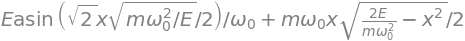

In [135]:
# Definición de símbolos
sym = sp.symbols('t_0 t x S_0 omega_0 m E p')
t_0, t, x, S_0, omega_0, m, E, p = sym[0], sym[1], sym[2], sym[3], sym[4], sym[5], sym[6], sym[7]

S0 = m*omega_0*x/2*(sp.sqrt(2*E/(m*omega_0**2)-x**2)) + E/omega_0*sp.asin(sp.sqrt(m*omega_0**2/(2*E))*x)
S0

\begin{equation} \tag{9}

S_0(q, E) = \frac{m \omega_0}{2} x \left( \sqrt{\frac{2E}{m\omega_0^2} - x^2} \right) + \frac{E}{\omega_0} \sin^{-1} \left( \sqrt{\frac{m\omega_0^2}{2E}} x \right)

\end{equation} \tag{9}

Sabiendo que $\frac{\partial S}{\partial E} = \frac{\partial S_0}{\partial E} + \Delta t = cte$ tomamos ahora las cantidades $p = \frac{\partial S_0}{\partial x}, \ \ Q_E = \frac{\partial S_0}{\partial E}$

De la ecuación (8) se observa que $\frac{\partial S_0}{\partial x}$

\begin{equation} \tag{10}

p = \frac{\partial S_0}{\partial x} =  m\omega_0 \sqrt{\frac{2E}{m\omega_0^2}-x^2}

\end{equation} \tag{10}

Por lo tanto

In [136]:
Q_E = sp.Eq(t-t_0, S0.diff(E)) 
X = sp.solve(Q_E, x)
sp.simplify(sp.Eq(x, X[0]))

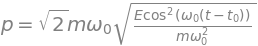

In [137]:
P = m*omega_0*sp.sqrt(2*E/(m*omega_0**2) - x**2)

P = sp.Eq(p,sp.simplify(P.subs(x, X[0])))
P

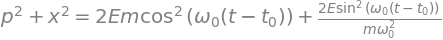

In [138]:
sp.Eq(p**2 + x**2, P.rhs**2 + X[0]**2)

Ahora se quiere observar el diagrama de fases del sistema hamiltoniano que muestra las trayectorias de los puntos en el espacio de fases, lo que ayuda a visualizar cómo cambian la pocisión $x(t)$ y el momento total $p$ del oscilador a lo largo del tiempo. Esto es esencial para comprender el comportamiento dinámico del mismo, además se pueden identificar puntos de equilibrio y su estabilidad. Los puntos de equilibrio pueden ser estables, inestables o neutros, y esto afecta cómo el sistema responde a pequeñas perturbaciones.

se llega a que 

\begin{equation} \tag{11}

p^2 + x^2  = 2mE \cos^2{\omega_0 \Delta t} + \frac{2E}{m \omega_0^2} \sin^2{\omega_0 \Delta t}

\end{equation} \tag{11}

\begin{equation} \tag{12}

\frac{p^2}{m^2 \omega_0^2} + x^2  = \frac{2E}{m \omega_0^2}

\end{equation} \tag{12}

Representa de paramétricamente una elipse con semiejes $a = \sqrt{\frac{2E}{k}}$ y $b = m \omega_0 \sqrt{\frac{2E}{k}}$ con un área encerrada $A = 2\pi \frac{E}{\omega_0}$

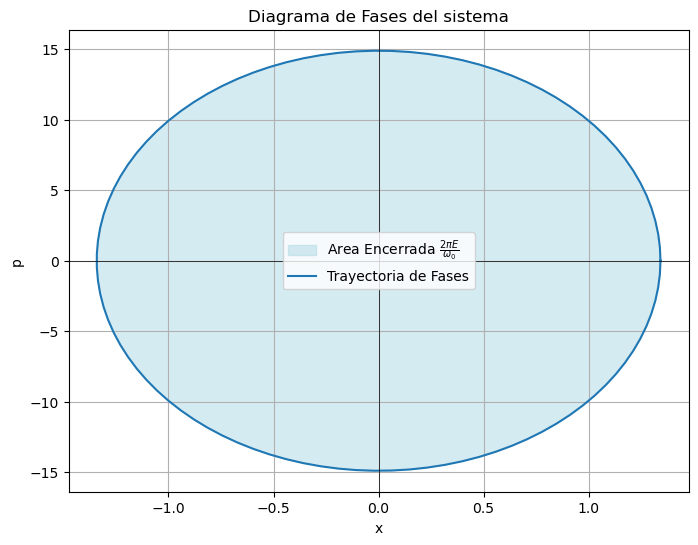

In [141]:
#DIAGRAMA DE FASES DEL SISTEMA HAMILTONIANO

import numpy as np
import matplotlib.pyplot as plt

E, omega_0, m = 10, 0.3, 1 # parámetros iniciales

# Parámetros de la elipse
a = omega_0*np.sqrt(2*m*E)  # semi-eje mayor

b = 1/omega_0 * np.sqrt(2*E/m)  # semi-eje menor

# Generar ángulos theta
theta = np.linspace(0, 2 * np.pi, 100)

# Coordenadas de la elipse
x = a * np.cos(theta)
y = b * np.sin(theta)

# Crear la gráfica
plt.figure(figsize=(8, 6))
plt.fill(x, y, color='lightblue', alpha=0.5, label = 'Area Encerrada $\\frac{2πE}{\omega_0}$')
plt.plot(x, y, label='Trayectoria de Fases')
plt.xlabel('x')
plt.ylabel('p')
plt.title('Diagrama de Fases del sistema')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(True)
#plt.gca().set_aspect('equal', adjustable='box')  # Igualar la relación de aspecto
plt.legend()
plt.show()


## **Variable de acción para el sistema masa-resorte**
En el caso donde $H(q, p)$ es independiente del tiempo, por consiguiente la energía se conserva y la variable de acción del sistema esta dada por la acción $S_0(q, E)$ que satisface a su vez la ecuación de Hamilton - Jacobi, por lo tanto en este caso la variable de acción depende directamente con la acción $S_0$ del sistema periodico, donde en este tipo de sistemas, lo importante en muchos casos es hallar las frecuencias del movimiento periodico mas que la trayectoria del mismo, es aqui donde la Variables de ángulo-acción cobran importancia en este tipo de sistemas **[cita libretexts]**. Considerando como $I$ la variable de acción que toma la integral cerrada alrededor de 1 solo periodo de oscilación del movimiento, entonces se define como:

\begin{equation} \tag{13}

I = \frac{1}{2 \pi} \oint p(x)dx = \frac{1}{2 \pi} \iint dp(x) dx \approx \frac{S_0(q, E)}{2 \pi}

\end{equation} \tag{13}

Por lo que para el caso del sistema que es objeto de estudio tomaria la forma

\begin{equation} \tag{14}

I = \frac{1}{2 \pi} \iint dp(x) dx

\end{equation} \tag{14}

Donde $\iint dpdq$ es el área encerrada por el espacio de fases $(p, q)$, por lo tanto para el caso del sistema conservativo en cuestión la variable de acción $I$ es:

\begin{equation} \tag{15}

I = \frac{1}{2 \pi} \pi a b = \frac{1}{2 \pi} \sqrt{\frac{2E}{k}} m \omega_0 \sqrt{\frac{2E}{k}} = \frac{E}{\omega_0}

\end{equation} \tag{15}

Introduciendo ahora el concepto de invariancia adiabática sobre la magnitud $I$, la energía dependerá directamente de la frecuencia del oscilador cuando alguno de los parámetros del sistema mecánico varie lo suficientemente lento en el tiempo **[cita landau]**. Ahora tomemos el caso en el cuál un parámetro $\lambda(t)$ perteneciente al sistema masa-resorte varia en el tiempo adiabaticamente.



## **Invarianza adiabática del sistema masa-resorte**

Ya se estudió el caso en el que el Hamiltoniano es independiente del tiempo. Ahora, suponemos un hamiltoniano $H(x,p, t) $ que implica que la energía dependa levemente del tiempo. Para lograr que la dependencia sea débil, se escoge un parámetro ($\lambda$) del sistema que varíe poco a lo largo de un período (se puede observar en la eq. **18**). Para el sistema estudiado en este trabajo, se puede escoger la masa $m(t)$ y/o la constante de elasticidad $k(t)$  como la variable que presentará pequeños cambios a lo largo de un período. Cuando existe una variación en  ($\lambda$) el movimiento se denomina como pertubado.

\begin{equation} \tag{16}

E(t) = H(x, p_x, t) = H(x, p_x, \lambda (t))

\end{equation} \tag{16}

Siguiendo con el analísis para un sistema pertubado lentamente, la tasa de cambio de la energía respecto al tiempo.

\begin{equation} \tag{17}
\frac{d E(t)}{dt} = \frac{\partial H}{\partial \lambda} \frac{d \lambda}{dt}
\end{equation} \tag{17}

Cuyo promedio a lo largo de un periodo es:

\begin{equation} \tag{18}
\overline{ \frac{d E(t)}{dt}} = \frac{d \lambda}{dt} \frac{1}{T} \int_0^T \frac{\partial H}{\partial \lambda} dt
\end{equation}  \tag{18}

Usando las ecuaciones de Hamilton, entonces $dq = \frac{\partial H}{\partial p} \bigg|_{q, \lambda}$ y además $\frac{1}{\frac{\partial H}{\partial p} \big|_{q}} = \frac{\partial p}{\partial E} \bigg|_{q}$
se llega a que:

\begin{equation} \tag{19}

\frac{\partial I}{\partial E} = \frac{1}{2\pi} \oint \frac{\partial p}{\partial E} \bigg|_{q,\lambda} dq = \frac{1}{2\pi} \oint \frac{dq}{\partial H / \partial p} \bigg|_{q,\lambda} = \frac{1}{2\pi} \oint dt = \frac{T}{2\pi} = \frac{1}{\omega}

\end{equation}  \tag{19}

Expresión con la cuál se comprueba la variable de acción $I$ bajo la condición de leve variación temporal, dependiente del periodo $T$


### **Variables Ángulo - Acción del sistema**

Cuando el hamiltoniano depende del tiempo puede ser bastante difícil de resolver para el movimiento porque es difícil encontrar constantes de movimiento para sistemas dependientes del tiempo. Sin embargo, si la dependencia del tiempo es suficientemente lenta, es decir, si el movimiento es adiabático, entonces existen variables dinámicas que son casi constantes las cuales pueden ser utilizadas para resolver para el movimiento, llamadas variables de ángulo-acción **[cita libretexts]**.

La acción abreviada en función de $I$ y el parámetro $\lambda$ $\ S_0(x, I, \lambda)$,donde $\lambda$ inicialmente es una constante

\begin{equation} \tag{20}

S_0(x, I, \lambda) = \int p(x, I, \lambda) dx

\end{equation} \tag{20}

De acuerdo a las eqs. **13** y **20**, las nuevas ecuaciones de la transformación canónica de coordenadas $(x, p) \ \rightarrow \ (I, \phi)$ son

\begin{equation} \tag{21}

p = \frac{\partial S_0(x, I, \lambda)}{\partial q} \ \ \ \ \ \phi = \frac{\partial S_0(x, I, \lambda)}{\partial I}

\end{equation} \tag{21}

Junto con el nuevo hamiltoniano $H'(I, \phi, \lambda) = E (I, \lambda)$ surgen las ecuaciones de hamilton para las nuevas coordenadas canónicas $(I, \phi)$, además de acuerdo a la eq. **19** $E(I, \lambda) = I \omega_0$ se llega a:

\begin{equation} \tag{22}

\dot I = - \frac{\partial H'}{\partial \phi} = 0 \ \ \ \ \dot \phi = \frac{\partial E}{\partial I} = \omega_0(I, \lambda)

\end{equation} \tag{22}

Ahora observemos el caso en el cuál el hamiltoniano es depenetiente del tiempo através de la variación lenta del parámetro $\lambda(t)$, entonces $H'(\phi, I, t) = H + \frac{\partial S_0(x, I, \lambda)}{\partial t}$, con lo cuál

\begin{equation} \tag{23}

H'(\phi, I, t) = E + \frac{\partial S_0}{\partial t} = E(I, \lambda) + \frac{\partial S_0}{\partial \lambda} \dot \lambda

\end{equation} \tag{23}

Dando lugar a la modificación de las eqs. en **22**, con lo que las ecuaciones de hamilton quedan como

\begin{equation} \tag{24}

\dot I = - \frac{\partial }{\partial \phi} \left(\frac{\partial S_0}{\partial \lambda} \right) \dot \lambda \ \ \ \ \dot \phi = \frac{\partial E(I, \lambda)}{\partial I} + \frac{\partial}{\partial I} \left(\frac{\partial S_0}{\partial \lambda} \right) \dot \lambda

\end{equation} \tag{24}

Aplicando finalmente las condiciones anteriores al sistema en cuestión, las coordenadas antiguas $(x, p)$ en función de las nuevas se expresan en la eq. 25. Sea entonces la frecuencia $\omega$ el parámetro que variará levemente en el sistema, por lo que $\omega \rightarrow \lambda(t)$, además según la eq. **22** $\phi = \omega_0 (t-t_0)$ por lo que $\phi = \lambda(t) (t-t_0)$ y $E = I \lambda(t)$

In [46]:
I, phi, phi_p, Lambda = sp.symbols('I'), sp.symbols('phi'), sp.symbols('phi_p'),  sp.symbols('lambda')

P = ((P.subs(E, I*Lambda)).subs(omega_0*(t-t_0), phi)).subs(omega_0, Lambda)
P

In [35]:
X = ((X[0].subs(E, I*Lambda)).subs(omega_0*(t-t_0), phi)).subs(omega_0, Lambda)
X

\begin{equation} \tag{25}

x(\phi, I) = \sqrt{\frac{2I}{m\lambda}} \sin{\phi} \ \ \ \ p(\phi, I) = \sqrt{2Im\lambda} \cos{\phi}

\end{equation} \tag{25}

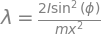

In [62]:
λ = sp.Eq(Lambda, sp.solve(sp.Eq(x, X), Lambda)[0])
λ

Luego la acción $S_0(x, I, \lambda)$ queda expresada como sigue

\begin{equation} \tag{26}

S_0(x, I, \lambda) = \int_0^x p(x, I, \lambda)dx = \int_0^\phi 2I \cos^2{\phi'}d\phi'

\end{equation} \tag{26}

con $\phi = \sin^{-1}{x\sqrt{\frac{m\lambda}{2I}}}$, entonces se procede a encontrar las soluciones de las ecuaciones de hamilton de las nuevas variables en función del parámetro variable $\lambda(t) = \omega(t)$

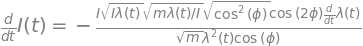

In [128]:
phi = sp.asin(x*sp.sqrt(m*Lambda/(2*I)))

S0 = sp.integrate(2*I*sp.cos(phi_p)**2, (phi_p, 0, phi))
S0 = S0.subs(Lambda, λ.rhs)

phi = sp.symbols('phi')
lamb_t, I_t, phi_t, omega_t = sp.Function('lambda')(t), sp.Function('I')(t), sp.Function('phi')(t), sp.Function('omega')(t)


dS0_dlambda = sp.simplify(sp.diff(S0, phi)*1/sp.diff(λ.rhs, phi)).subs(x, X)


dot_I = -sp.simplify(sp.diff(dS0_dlambda, phi)*sp.diff(lamb_t, t))

sp.Eq(sp.diff(I_t, t), dot_I.subs(Lambda, lamb_t))

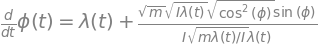

In [112]:
dot_phi = Lambda + sp.simplify(sp.diff(dS0_dlambda, I))
sp.Eq(sp.diff(phi_t, t), dot_phi.subs(Lambda, lamb_t))

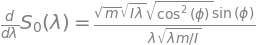

In [109]:
S0_lamb = sp.Function('S0')(Lambda)
sp.Eq(sp.diff(S0_lamb, Lambda), sp.simplify(dS0_dlambda))

por lo tanto las respectivas expresiones de las Eqs. **24** quedan desarrolladas como se sigue

\begin{align} \tag{27}

\dot I = - I \cos{2 \phi} \frac{\dot \lambda}{\lambda} = -I \cos{2 \phi} \frac{\dot \omega}{\omega} \\
\dot \phi = \lambda + \sin{2 \phi} \frac{\dot \lambda}{\lambda} = \omega + \sin{2 \phi} \frac{\dot \omega}{\omega}

\end{align} \tag{27}

El hamiltoniano $H'$ de acuerdo a la eq. **23** y las soluciones posteriores quedaria denotado como

\begin{equation} \tag{28}

H'(\phi, I, t) = E(I, \omega) + \frac{\partial S_0}{\partial \lambda} = E(I, \omega) + \frac{I}{2 \lambda} \sin{2 \phi}

\end{equation} \tag{28}

Donde la frecuencia $\omega(t)$ es el parámetro con dependencia del tiempo, además de la eq. **28** se puede denotar la linealidad del oscilador dada la dependencia lineal del nuevo hamiltoniano $H'$ de la variable $I$.

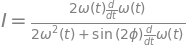

In [132]:
#Desacoplando I

dot_omega = sp.Eq(sp.diff(omega_t, t), I*omega_t + I/2*sp.sin(2*phi)*sp.diff(omega_t, t)/omega_t)

sp.Eq(I, sp.simplify(sp.solve(dot_omega, I)[0]))

Desacoplando el primer término de la eq. **27** queda

\begin{equation} \tag{28}

I(\omega)  = \frac{2 \dot \omega}{2 \omega + \sin{2 \phi} \frac{\dot \omega}{\omega}}

\end{equation} \tag{28}

Ahora de acuerdo a lo anterior observemos el diagrama de fases correspondiente a las nuevas coordenadas donde $I, \phi$ son el nuevo "momento" canónico y la variable angular correspondientemente.

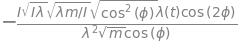

In [127]:
#Integrando las eqs. 27

I_omega = sp.integrate(dot_I, t)
I_omega

https://physics.stackexchange.com/questions/600117/adiabatic-invariant-in-variable-mass-oscillator

